In [1]:
# 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 작업 폴더 이동

HOME = '/content/drive/MyDrive/20240603'

import os
%cd {HOME}

/content/drive/MyDrive/20240603


In [3]:
# 1. 한글 폰트 설치
# 2. 런타임 재시작
# 3. 한글 폰트 설정 코드 작성

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 33s (316 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and direc

In [4]:
# 데이터 불러오기

import pandas as pd

mv = pd.read_csv('movies_train.csv')
mv

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [5]:
# 데이터 기초 정보 확인

mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [9]:
# 결측치를 중간값으로 채우기

data = mv.fillna(mv.median(numeric_only=True))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  600 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [10]:
# 데이터 기술 통계 정보 살펴보기

data.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,7.358323e+05,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.233810e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,4.784236e+05,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,4.784236e+05,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [12]:
# 범주형 데이터 확인하기
# 배급사

# data['distributor'].unique()
data['distributor'].value_counts()

distributor
CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: count, Length: 169, dtype: int64

In [13]:
# 배급사 데이터 속성의 비율

data['distributor'].value_counts(normalize=True)

distributor
CJ 엔터테인먼트        0.090000
롯데엔터테인먼트         0.086667
(주)NEW           0.050000
(주)마운틴픽쳐스        0.048333
(주)쇼박스           0.043333
                   ...   
OAL(올)           0.001667
(주)에이원 엔터테인먼트    0.001667
(주)콘텐츠 윙         0.001667
위더스필름            0.001667
퍼스트런             0.001667
Name: proportion, Length: 169, dtype: float64

In [14]:
# 장르

#data['genre'].unique()
#data['genre'].value_counts()
data['genre'].value_counts(normalize=True)

genre
드라마       0.368333
다큐멘터리     0.155000
멜로/로맨스    0.130000
코미디       0.088333
공포        0.070000
액션        0.046667
느와르       0.045000
애니메이션     0.035000
미스터리      0.028333
SF        0.021667
뮤지컬       0.008333
서스펜스      0.003333
Name: proportion, dtype: float64

In [18]:
# 상영등급의 종류와 상영등급별 개수를 출력

#data['screening_rat'].unique()
#data['screening_rat'].value_counts()
data['screening_rat'].value_counts(normalize=True)

screening_rat
청소년 관람불가    0.340000
15세 관람가     0.336667
12세 관람가     0.170000
전체 관람가      0.153333
Name: proportion, dtype: float64

In [ ]:
# 상영등급 데이터 속성의 비율



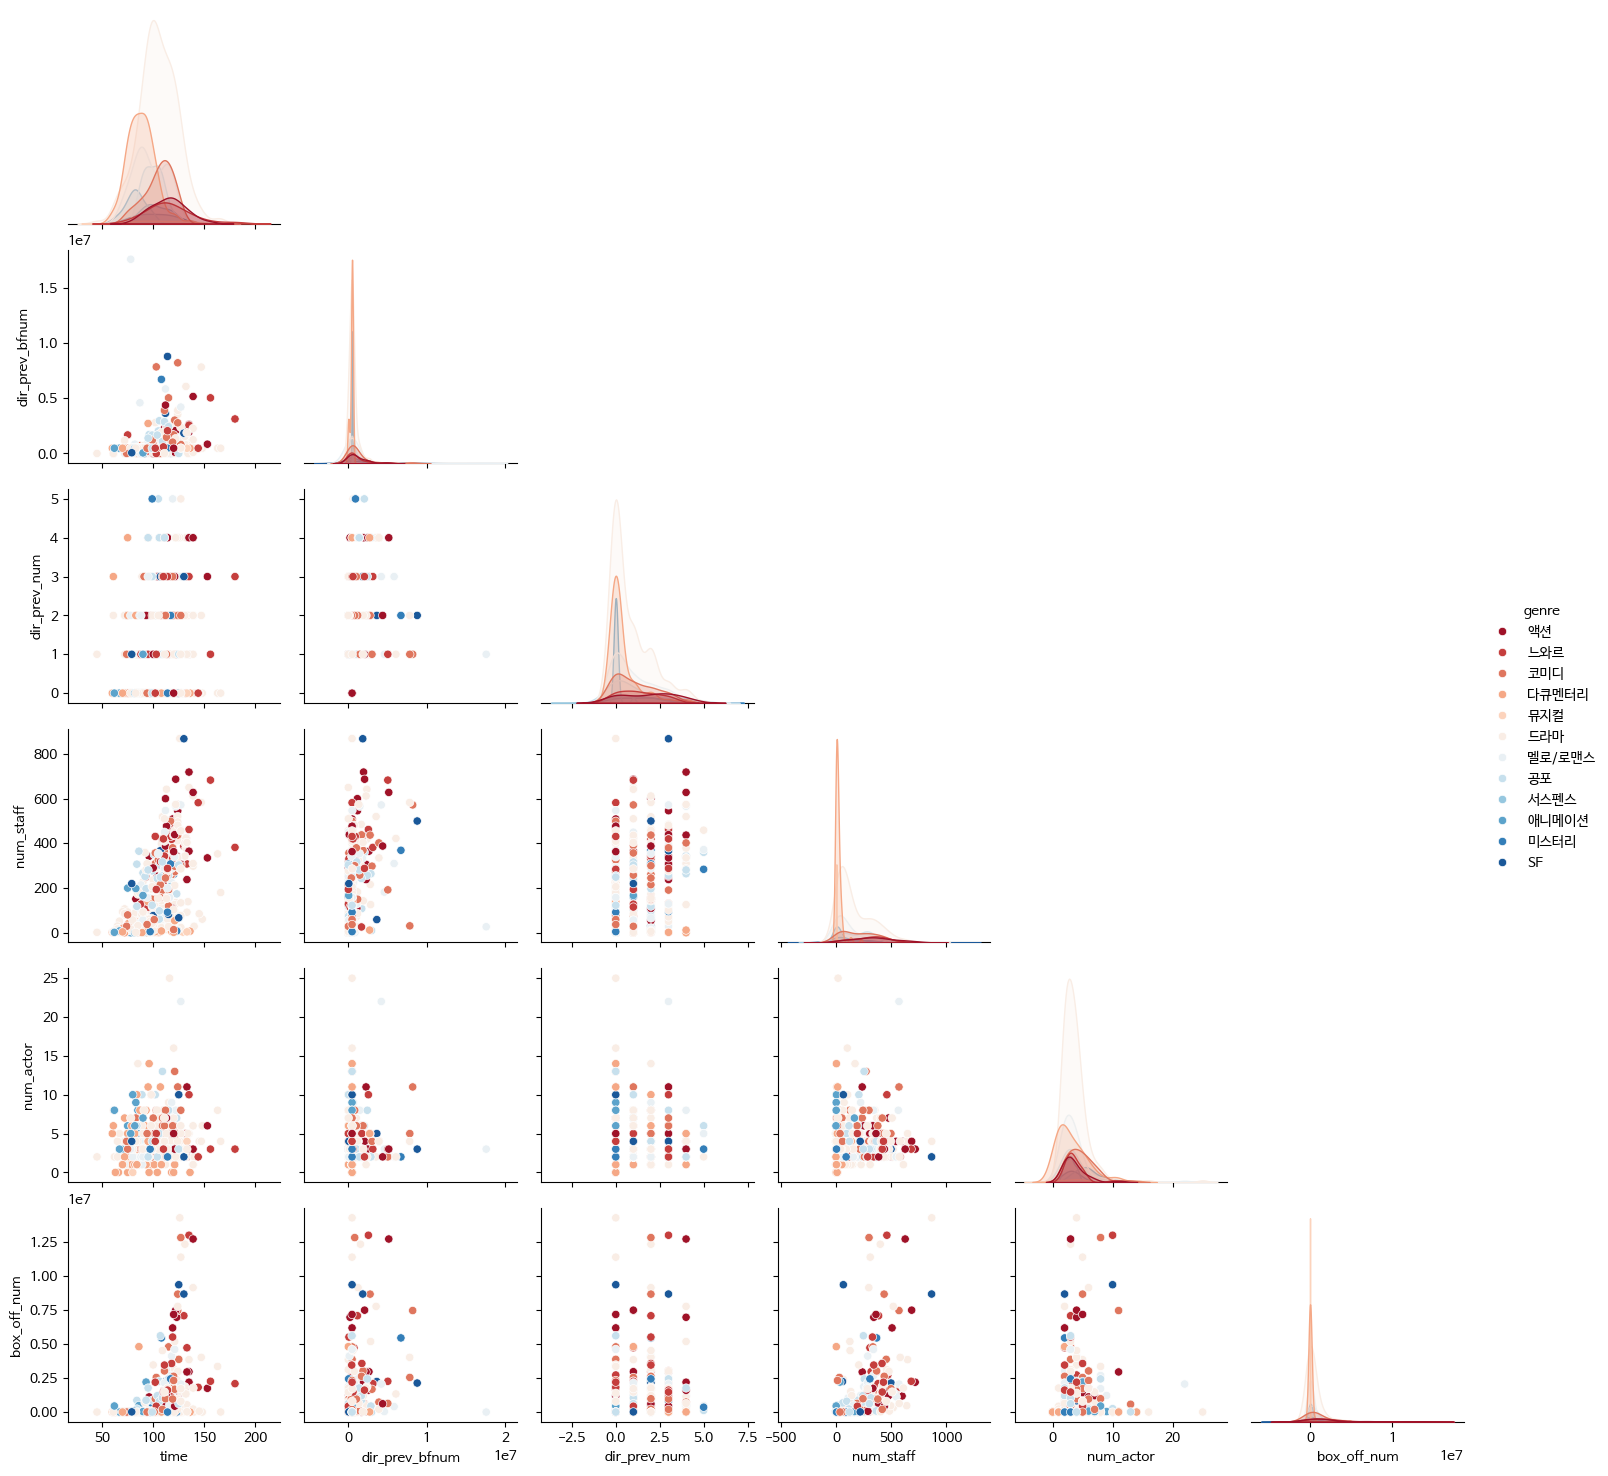

In [20]:
# 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

sns.pairplot(data, hue = 'genre', palette = 'RdBu', corner = True)
plt.show()


In [21]:
# 상관계수

corr = data.corr(numeric_only = True).round(2)
corr

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.00,0.23,0.31,0.62,0.11,0.44
dir_prev_bfnum,0.23,1.00,0.26,0.32,0.05,0.27
dir_prev_num,0.31,0.26,1.00,0.45,0.01,0.26
num_staff,0.62,0.32,0.45,1.00,0.08,0.54
num_actor,0.11,0.05,0.01,0.08,1.00,0.11
box_off_num,0.44,0.27,0.26,0.54,0.11,1.00


<Axes: >

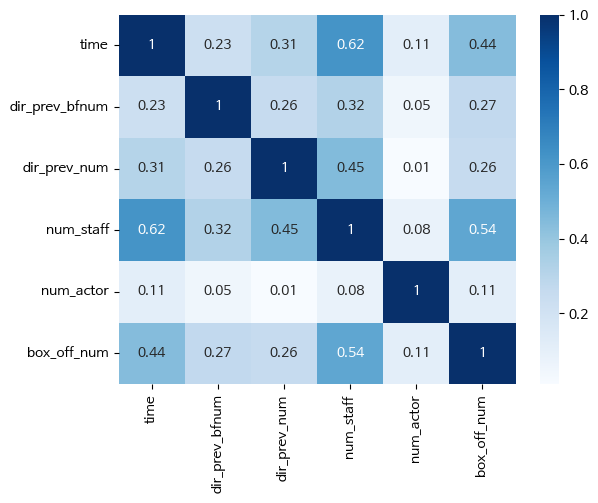

In [22]:
# 히트맵

sns.heatmap(corr, annot=True, cmap='Blues')

흥행 속성 추가하기

In [25]:
# 흥행 속성 추가하기

import numpy as np

data['hit'] = np.where(data['box_off_num']>=1000000, 1, 0)
data.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,hit
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.000,1,510,7,1475091,1
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.000,1,286,6,1716438,1
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,478423.625,0,123,4,2475,0
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,478423.625,0,431,4,2192525,1
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,478423.625,0,363,5,7166532,1


흥행 영화 개수

In [26]:
# 흥행 영화 개수 출력

data['hit'].value_counts()

hit
0    491
1    109
Name: count, dtype: int64

독립 변수
*   distributor,
*   genre
*   screening_rat
*   dir_prev_bfnum
*   dir_prev_num
*  num_staff
* num_actor

종속 변수
* hit




In [ ]:
data.info()

In [29]:
# 독립변수, 종속변수 추출

X = data.iloc[:, [1,2,5,7,8,9,10]]
y=data['hit']

X

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,롯데엔터테인먼트,액션,청소년 관람불가,478423.625,0,91,2
1,(주)쇼박스,느와르,청소년 관람불가,1161602.500,2,387,3
2,(주)쇼박스,액션,15세 관람가,220775.250,4,343,4
3,(주)NEW,코미디,전체 관람가,23894.000,2,20,6
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.000,1,251,2
...,...,...,...,...,...,...,...
595,(주)NEW,드라마,청소년 관람불가,3833.000,1,510,7
596,(주)쇼박스,드라마,15세 관람가,496061.000,1,286,6
597,(주)마운틴픽쳐스,공포,청소년 관람불가,478423.625,0,123,4
598,CJ 엔터테인먼트,느와르,15세 관람가,478423.625,0,431,4


In [30]:
# 범주형 데이터를 수치형 데이터로 변환하기

X = pd.get_dummies(X, columns = ['distributor', 'genre', 'screening_rat'])
X

,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,distributor_(주) 브릿지웍스,distributor_(주) 액티버스엔터테인먼트,distributor_(주) 영화사조제,distributor_(주) 영화제작전원사,distributor_(주) 케이알씨지,distributor_(주)JK필름,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,478423.625,0,91,2,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,1161602.500,2,387,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,220775.250,4,343,4,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,23894.000,2,20,6,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,1.000,1,251,2,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3833.000,1,510,7,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
596,496061.000,1,286,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
597,478423.625,0,123,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
598,478423.625,0,431,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [32]:
# train_test_split()으로 훈련용, 테스트용으로 데이터 8.2로 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 189), (120, 189), (480,), (120,))

In [33]:
# 랜덤포레스트 모델 만들고 훈련 데이터로 학습하기

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 훈련 데이터에 대한 랜덤포레스트 모델의 정확도 출력하기

print(model.score(X_train, y_train))

테스트 데이터와 모델의 분류결과 데이터프레임으로 만들어 확인하기

In [34]:
# 테스트 데이터와 모델의 분류결과 데이터프레임으로 만들어 확인하기

y_pred = model.predict(X_test)

result = pd.DataFrame({'Actual Value':y_test, 'model prediction':y_pred})
result.head()

,Actual Value,model prediction
110,1,0
419,0,0
565,0,0
77,0,0
181,1,0


In [35]:
# 테스트 데이터에 대한 모델의 정확도 출력하기

model.score(X_test, y_test)

0.8083333333333333

In [36]:
# 테스트 데이터에 대한 모델의 classification report 출력하기

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        92
           1       0.69      0.32      0.44        28

    accuracy                           0.81       120
   macro avg       0.76      0.64      0.66       120
weighted avg       0.79      0.81      0.78       120



In [37]:
# 테스트 데이터에 대한 모델의 혼동행렬 출력하기

from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
cf

array([[88,  4],
       [19,  9]])

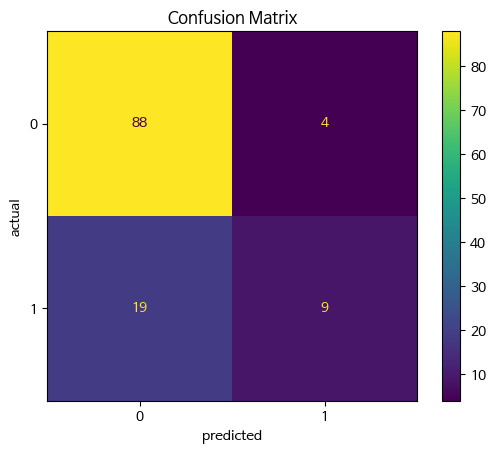

In [45]:
# 혼동행렬 그래프로 출력하기

import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.title('Confusion Matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()


In [53]:
# 의사결정 트리와 성능 비교하기

#model.feature_names_in_

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)

#import matplotlib.pyplot as plt
#from sklearn.tree import plot_tree

#plt.figure(figsize=(20,15))
#plot_tree(tree,filled=True,feature_names=tree.feature_names_in_)

#plt.show()

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.7583333333333333


In [62]:
# 과대적합 줄이기

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42, max_depth=12)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9979166666666667
0.75
